# Xarray Fundamentals


## Learning Objectives

- Provide an overview of xarray
- Describe the core xarray data structures, the DataArray and the Dataset, and
  the components that make them up
- Load xarray dataset from a netCDF file
- View and set attributes


## What Is Xarray?

- Unlabeled, N-dimensional arrays of numbers (e.g., NumPy’s ndarray) are the
  most widely used data structure in scientific computing. However, they lack a
  meaningful representation of the metadata associated with their data.
  Implementing such functionality is left to individual users and
  domain-specific packages.

- xarry expands on the capabilities of NumPy arrays, providing a lot of
  streamline data manipulation.

- Xarray's interface is based largely on the netCDF data model (variables,
  attributes, and dimensions), but it goes beyond the traditional netCDF
  interfaces to provide functionality similar to netCDF-java's Common Data Model
  (CDM).

- xarray is motivated by weather and climate use cases but is **domain
  agnostic**...


## Core Data Structures

- xarray has 2 fundamental data structures:

  - `DataArray`, which holds single multi-dimensional variables and its
    coordinates
  - `Dataset`, which holds multiple variables that potentially share the same
    coordinates

![](../images/xarray-data-structures.png)


#### Loading data from netCDF

- NetCDF (network Common Data Form) is a file format for storing
  multidimensional array data
- NetCDF is a self-describing, meaning that a netCDF file includes information
  about the data it contains, and the necessary metadata such as coordinate
  system used, attributes describing the data, etc...
- NetCDF is used extensively in the geoscience communities
- Xarray's interface is based largely on the netCDF data model

Learn more about netCDF
[here](https://www.unidata.ucar.edu/software/netcdf/docs/faq.html#whatisit).


In [1]:
import xarray as xr

In [2]:
# Load mean sea surface temperature dataset
ds = xr.open_dataset("../data/sst.mnmean.nc", engine="netcdf4")

# xarray's HTML representation
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 128)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    geospatial_lon_min:        -1.0
    geospatial_lon_max:        359.0
    geospatial_laty_max:       89.0
    geospatial_laty_min:       -89.0
    geospatial_lat_max:        89.0
    geospatial_lat_min:        -89.0
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east
    cdm_data_type:             Grid
    project:                   NOAA Extended Reconstructed Sea Surface Temper...
    original_publisher_url:    http://www.ncdc.noaa.gov
    References:                https://www.ncdc.noaa.gov/data-access/marineoc...
    source:                    In situ data: ICOADS R3.0 before 2015, NCEP in...
    title:                     NOAA ERSSTv5 (in situ only)
    history:                   created 07/2017 by PSD data using NCEI's ERSST...
    institution:               This version written at NOAA/ESRL PSD: obtaine...
    citation:                  Huang et al, 2017: Extended Reconstructed Sea ...
    platform:                  Ship and Buoy SSTs from ICOADS R3.0 and NCEP GTS
    standard_name_vocabulary:  CF Standard Name Table (v40, 25 January 2017)
    processing_level:          NOAA Level 4
    Conventions:               CF-1.6, ACDD-1.3
    metadata_link:             :metadata_link = https://doi.org/10.7289/V5T72...
    creator_name:              Boyin Huang (original)
    date_created:              2017-06-30T12:18:00Z (original)
    product_version:           Version 5
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2020-09-07

In [3]:
# If you prefer a text based repr, you can set the display_style='text' by uncommenting the line below
# xr.set_options(display_style="text")

In [4]:
# Look at the netCDF representation
ds.info()

xarray.Dataset {
dimensions:
	lat = 89 ;
	lon = 180 ;
	time = 128 ;

variables:
	float32 lat(lat) ;
		lat:units = degrees_north ;
		lat:long_name = Latitude ;
		lat:actual_range = [ 88. -88.] ;
		lat:standard_name = latitude ;
		lat:axis = Y ;
		lat:coordinate_defines = center ;
	float32 lon(lon) ;
		lon:units = degrees_east ;
		lon:long_name = Longitude ;
		lon:actual_range = [  0. 358.] ;
		lon:standard_name = longitude ;
		lon:axis = X ;
		lon:coordinate_defines = center ;
	datetime64[ns] time(time) ;
		time:long_name = Time ;
		time:delta_t = 0000-01-00 00:00:00 ;
		time:avg_period = 0000-01-00 00:00:00 ;
		time:prev_avg_period = 0000-00-07 00:00:00 ;
		time:standard_name = time ;
		time:axis = T ;
		time:actual_range = [19723. 80566.] ;
	float32 sst(time, lat, lon) ;
		sst:long_name = Monthly Means of Sea Surface Temperature ;
		sst:units = degC ;
		sst:var_desc = Sea Surface Temperature ;
		sst:level_desc = Surface ;
		sst:statistic = Mean ;
		sst:dataset = NOAA Extended Reconstr

### `Dataset`

- Xarray's `Dataset` is a dict-like container of labeled arrays (`DataArrays`)
  with aligned dimensions. - It is designed as an in-memory representation of a
  netCDF dataset.
- In addition to the dict-like interface of the dataset itself, which can be
  used to access any `DataArray` in a `Dataset`. Datasets have the following key
  properties:

| Attribute   | Description                                                                                                                              |
| ----------- | ---------------------------------------------------------------------------------------------------------------------------------------- |
| `data_vars` | OrderedDict of `DataArray` objects corresponding to data variables.                                                                      |
| `dims`      | dictionary mapping from dimension names to the fixed length of each dimension (e.g., {`lat`: 6, `lon`: 6, `time`: 8}).                   |
| `coords`    | a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings) |
| `attrs`     | OrderedDict to hold arbitrary metadata pertaining to the dataset.                                                                        |


In [5]:
# variables are in our dataset
ds.data_vars

Data variables:
    sst      (time, lat, lon) float32 ...

In [6]:
# select one variable and pick the first entry along the first axis (time)
ds.sst[0]

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    time     datetime64[ns] 2010-01-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

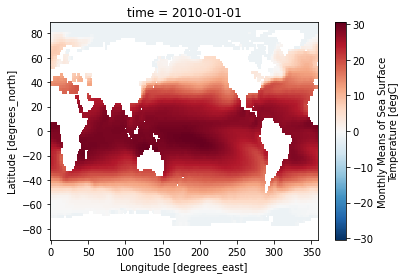

In [7]:
# Plot one timestep
ds.sst[0].plot()

In [8]:
# dataset dimensions
ds.dims

Frozen(SortedKeysDict({'lat': 89, 'lon': 180, 'time': 128}))

In [9]:
# dataset coordinates
ds.coords

Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01

In [10]:
# dataset global attributes
ds.attrs

{'climatology': 'Climatology is based on 1971-2000 SST, Xue, Y., T. M. Smith, and R. W. Reynolds, 2003: Interdecadal changes of 30-yr SST normals during 1871.2000. Journal of Climate, 16, 1601-1612.',
 'description': 'In situ data: ICOADS2.5 before 2007 and NCEP in situ data from 2008 to present. Ice data: HadISST ice before 2010 and NCEP ice after 2010.',
 'keywords_vocabulary': 'NASA Global Change Master Directory (GCMD) Science Keywords',
 'keywords': 'Earth Science > Oceans > Ocean Temperature > Sea Surface Temperature >',
 'instrument': 'Conventional thermometers',
 'source_comment': 'SSTs were observed by conventional thermometers in Buckets (insulated or un-insulated canvas and wooded buckets) or Engine Room Intaker',
 'geospatial_lon_min': -1.0,
 'geospatial_lon_max': 359.0,
 'geospatial_laty_max': 89.0,
 'geospatial_laty_min': -89.0,
 'geospatial_lat_max': 89.0,
 'geospatial_lat_min': -89.0,
 'geospatial_lat_units': 'degrees_north',
 'geospatial_lon_units': 'degrees_east',
 'c

### `DataArray`

The DataArray is xarray's implementation of a labeled, multi-dimensional array.
It has several key properties:

| Attribute | Description                                                                                                                              |
| --------- | ---------------------------------------------------------------------------------------------------------------------------------------- |
| `data`    | `numpy.ndarray` or `dask.array` holding the array's values.                                                                              |
| `dims`    | dimension names for each axis. For example:(`x`, `y`, `z`) (`lat`, `lon`, `time`).                                                       |
| `coords`  | a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings) |
| `attrs`   | an `OrderedDict` to hold arbitrary attributes/metadata (such as units)                                                                   |
| `name`    | an arbitrary name of the array                                                                                                           |


In [11]:
# Extract the sst variable/datarray
ds["sst"]  # Equivalent to ds.sst

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)>
[2050560 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [12]:
# The actual (numpy) array data
ds.sst.data

array([[[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       ...,

       [[-1.8, -1.8, -1.

In [13]:
# dataarray/variable dimensions
ds.sst.dims

('time', 'lat', 'lon')

In [14]:
# datarray/variable coordinates
ds.sst.coords

Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01

In [15]:
# dataarray/variable attributes
ds.sst.attrs

{'long_name': 'Monthly Means of Sea Surface Temperature',
 'units': 'degC',
 'var_desc': 'Sea Surface Temperature',
 'level_desc': 'Surface',
 'statistic': 'Mean',
 'dataset': 'NOAA Extended Reconstructed SST V5',
 'parent_stat': 'Individual Values',
 'actual_range': array([-1.8    , 42.32636], dtype=float32),
 'valid_range': array([-1.8, 45. ], dtype=float32)}

## Coordinates vs dimensions


- DataArray objects inside a Dataset may have any number of dimensions but are
  presumed to share a common coordinate system.
- Coordinates can also have any number of dimensions but denote
  constant/independent quantities, unlike the varying/dependent quantities that
  belong in data.
- A dimension is just a name of an axis, like "time"


In [16]:
ds.dims

Frozen(SortedKeysDict({'lat': 89, 'lon': 180, 'time': 128}))

In [17]:
ds.coords

Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01

In [18]:
# extracting a coordinate variable
ds.sst.lon

<xarray.DataArray 'lon' (lon: 180)>
array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
        24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,
        48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,
        72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,
        96.,  98., 100., 102., 104., 106., 108., 110., 112., 114., 116., 118.,
       120., 122., 124., 126., 128., 130., 132., 134., 136., 138., 140., 142.,
       144., 146., 148., 150., 152., 154., 156., 158., 160., 162., 164., 166.,
       168., 170., 172., 174., 176., 178., 180., 182., 184., 186., 188., 190.,
       192., 194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214.,
       216., 218., 220., 222., 224., 226., 228., 230., 232., 234., 236., 238.,
       240., 242., 244., 246., 248., 250., 252., 254., 256., 258., 260., 262.,
       264., 266., 268., 270., 272., 274., 276., 278., 280., 282., 284., 286.,
       288., 290., 292., 294., 296., 298., 300., 302., 304., 306., 308., 310.,
       312., 314., 316., 318., 320., 322., 324., 326., 328., 330., 332., 334.,
       336., 338., 340., 342., 344., 346., 348., 350., 352., 354., 356., 358.],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Attributes:
    units:               degrees_east
    long_name:           Longitude
    actual_range:        [  0. 358.]
    standard_name:       longitude
    axis:                X
    coordinate_defines:  center

In [19]:
# extracting a coorindate variable from .coords
ds.coords["time"]

<xarray.DataArray 'time' (time: 128)>
array(['2010-01-01T00:00:00.000000000', '2010-02-01T00:00:00.000000000',
       '2010-03-01T00:00:00.000000000', '2010-04-01T00:00:00.000000000',
       '2010-05-01T00:00:00.000000000', '2010-06-01T00:00:00.000000000',
       '2010-07-01T00:00:00.000000000', '2010-08-01T00:00:00.000000000',
       '2010-09-01T00:00:00.000000000', '2010-10-01T00:00:00.000000000',
       '2010-11-01T00:00:00.000000000', '2010-12-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2011-02-01T00:00:00.000000000',
       '2011-03-01T00:00:00.000000000', '2011-04-01T00:00:00.000000000',
       '2011-05-01T00:00:00.000000000', '2011-06-01T00:00:00.000000000',
       '2011-07-01T00:00:00.000000000', '2011-08-01T00:00:00.000000000',
       '2011-09-01T00:00:00.000000000', '2011-10-01T00:00:00.000000000',
       '2011-11-01T00:00:00.000000000', '2011-12-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2012-02-01T00:00:00.000000000',
       '2012-03-01T00:00:00.000000000', '2012-04-01T00:00:00.000000000',
       '2012-05-01T00:00:00.000000000', '2012-06-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2012-08-01T00:00:00.000000000',
       '2012-09-01T00:00:00.000000000', '2012-10-01T00:00:00.000000000',
       '2012-11-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2013-02-01T00:00:00.000000000',
       '2013-03-01T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
       '2013-05-01T00:00:00.000000000', '2013-06-01T00:00:00.000000000',
       '2013-07-01T00:00:00.000000000', '2013-08-01T00:00:00.000000000',
       '2013-09-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2013-11-01T00:00:00.000000000', '2013-12-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2014-02-01T00:00:00.000000000',
       '2014-03-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-05-01T00:00:00.000000000', '2014-06-01T00:00:00.000000000',
       '2014-07-01T00:00:00.000000000', '2014-08-01T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000',
       '2014-11-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-05-01T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
       '2015-07-01T00:00:00.000000000', '2015-08-01T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2016-04-01T00:00:00.000000000',
       '2016-05-01T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-09-01T00:00:00.000000000', '2016-10-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-05-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-09-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-01-01T0

## Attributes

Attributes can be used to store metadata. What metadata should you store? It
depends on your domain and your needs


In [20]:
# Look at global attributes
ds.attrs

{'climatology': 'Climatology is based on 1971-2000 SST, Xue, Y., T. M. Smith, and R. W. Reynolds, 2003: Interdecadal changes of 30-yr SST normals during 1871.2000. Journal of Climate, 16, 1601-1612.',
 'description': 'In situ data: ICOADS2.5 before 2007 and NCEP in situ data from 2008 to present. Ice data: HadISST ice before 2010 and NCEP ice after 2010.',
 'keywords_vocabulary': 'NASA Global Change Master Directory (GCMD) Science Keywords',
 'keywords': 'Earth Science > Oceans > Ocean Temperature > Sea Surface Temperature >',
 'instrument': 'Conventional thermometers',
 'source_comment': 'SSTs were observed by conventional thermometers in Buckets (insulated or un-insulated canvas and wooded buckets) or Engine Room Intaker',
 'geospatial_lon_min': -1.0,
 'geospatial_lon_max': 359.0,
 'geospatial_laty_max': 89.0,
 'geospatial_laty_min': -89.0,
 'geospatial_lat_max': 89.0,
 'geospatial_lat_min': -89.0,
 'geospatial_lat_units': 'degrees_north',
 'geospatial_lon_units': 'degrees_east',
 'c

In [21]:
# Look at variable specific attributes
ds.sst.attrs

{'long_name': 'Monthly Means of Sea Surface Temperature',
 'units': 'degC',
 'var_desc': 'Sea Surface Temperature',
 'level_desc': 'Surface',
 'statistic': 'Mean',
 'dataset': 'NOAA Extended Reconstructed SST V5',
 'parent_stat': 'Individual Values',
 'actual_range': array([-1.8    , 42.32636], dtype=float32),
 'valid_range': array([-1.8, 45. ], dtype=float32)}

In [22]:
# Set some arbitray attribute on a data variable/datarray
ds.sst.attrs["my_custom_attribute"] = "Foo Bar"
ds.sst.attrs

{'long_name': 'Monthly Means of Sea Surface Temperature',
 'units': 'degC',
 'var_desc': 'Sea Surface Temperature',
 'level_desc': 'Surface',
 'statistic': 'Mean',
 'dataset': 'NOAA Extended Reconstructed SST V5',
 'parent_stat': 'Individual Values',
 'actual_range': array([-1.8    , 42.32636], dtype=float32),
 'valid_range': array([-1.8, 45. ], dtype=float32),
 'my_custom_attribute': 'Foo Bar'}

## Going Further

- Xarray Documentation on Data Structures:
  http://xarray.pydata.org/en/latest/data-structures.html
- Xarray Documentation on Reading files and writing files:
  https://xarray.pydata.org/en/stable/io.html


<div class="alert alert-block alert-success">
  <p>Next: <a href="02_indexing.ipynb">Indexing</a></p>
</div>
